# Breast Cancer
 - the goal is to predict if the cancer is: 2 - benign or 4 - malignant

### Data set information
This dataset is publicly available.

This breast cancer databases was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg. If you publish results when using this database, then please include this information in your acknowledgements. Also, please cite one or more of:
1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.
2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of pattern separation for medical diagnosis applied to breast cytology", Proceedings of the National Academy of Sciences, U.S.A., Volume 87, December 1990, pp 9193-9196.
3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition via linear programming: Theory and application to medical diagnosis", in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying Li, editors, SIAM Publications, Philadelphia 1990, pp 22-30.
4. K. P. Bennett & O. L. Mangasarian: "Robust linear programming discrimination of two linearly inseparable sets", Optimization Methods and Software 1, 1992, 23-34 (Gordon & Breach Science Publishers).

### Data set description
Input variables:
1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
Output variable (target):
11. Class: (2 for benign, 4 for malignant)

### ML models:
1. Logistic Regression
2. K-Nearest Neighbours
3. Support Vector Machine
4. Kernel SVM
5. Naive Bayes
6. Decision Tree Classification
7. Random Forest Classification
8. XGBoost
9. CatBoost


## Import Libraries and Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

In [2]:
dataset = pd.read_csv('Data.csv', header=None)



```
# This is formatted as code
```

## Data Cleaning

In [3]:
dataset.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [4]:
dataset.rename(columns={0: "Sample Code Number", 1: "Clump Thickness", 2: "Uniformity of Cell Size", 3: "Uniformity of Cell Shape", 
                   4: "Marginal Adhesion", 5: "Single Epithelial Cell Size", 6: "Bare Nuclei", 7: "Bland Chromatin", 
                   8: "Normal Nucleoli", 9: "Mitoses", 10: "Class"}, inplace=True)

In [5]:
dataset.head()

,Sample Code Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
dataset.describe()

,Sample Code Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample Code Number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [8]:
dataset["Bare Nuclei"].describe()

count     699
unique     11
top         1
freq      402
Name: Bare Nuclei, dtype: object

The column Bare Nuclei has 11 values instead of 10 as it should be according to the specification.

In [9]:
dataset["Bare Nuclei"].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [10]:
question_mark = dataset.loc[(dataset["Bare Nuclei"] == "?")]
question_mark

,Sample Code Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


Replacing the "?" with median and converting "Bare Nuclei" column to int.

In [11]:
dataset.loc[(dataset["Bare Nuclei"] != "?")].median()

Sample Code Number             1171795.0
Clump Thickness                      4.0
Uniformity of Cell Size              1.0
Uniformity of Cell Shape             1.0
Marginal Adhesion                    1.0
Single Epithelial Cell Size          2.0
Bare Nuclei                          1.0
Bland Chromatin                      3.0
Normal Nucleoli                      1.0
Mitoses                              1.0
Class                                2.0
dtype: float64

In [12]:
dataset = dataset.replace("?", 1)
dataset

,Sample Code Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [13]:
dataset = dataset.astype({"Bare Nuclei": int})

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample Code Number           699 non-null    int64
 1   Clump Thickness              699 non-null    int64
 2   Uniformity of Cell Size      699 non-null    int64
 3   Uniformity of Cell Shape     699 non-null    int64
 4   Marginal Adhesion            699 non-null    int64
 5   Single Epithelial Cell Size  699 non-null    int64
 6   Bare Nuclei                  699 non-null    int64
 7   Bland Chromatin              699 non-null    int64
 8   Normal Nucleoli              699 non-null    int64
 9   Mitoses                      699 non-null    int64
 10  Class                        699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


In [15]:
dataset.duplicated().sum()

9

Shows nine duplicates, but since is unknown whether is 1 Sample Code equals 1 patient, I'll not drop them.

## Correlation Matrix

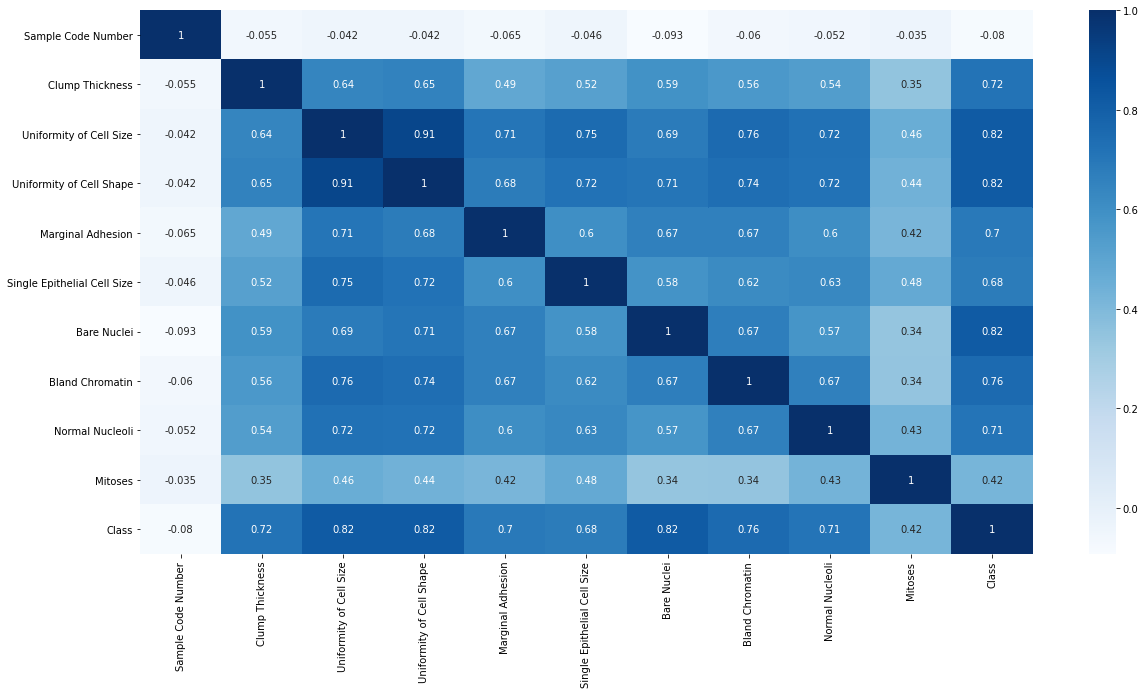

In [16]:
fig = plt.figure(figsize = (20,10))
sns.heatmap(dataset.corr(), cmap='Blues', annot = True)

## Preparation for Training and Testing

### Defining dependent and independent variables

In [17]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Splitting the data set into the Training and Test set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

### Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Models

### 1. Logistic Classification

In [20]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state = 0)
log_classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
y_pred = log_classifier.predict(X_test)

In [22]:
cm_log = confusion_matrix(y_test, y_pred)
print(cm_log)

accuracy_score_log_reg = accuracy_score(y_test, y_pred)
accuracy_score_log_reg = "{:.2f} %".format(accuracy_score_log_reg.mean()*100)
precision_score_log_reg = precision_score(y_test, y_pred, pos_label = 4)
precision_score_log_reg = "{:.2f} %".format(precision_score_log_reg.mean()*100)
recall_score_log_reg = recall_score(y_test, y_pred, pos_label = 4)
recall_score_log_reg = "{:.2f} %".format(recall_score_log_reg.mean()*100)

[[94  1]
 [ 4 41]]


In [23]:
accuracies = cross_val_score(estimator = log_classifier, X = X_train, y = y_train, cv = 10)
val_accuracy_score_log_reg = "{:.2f} %".format(accuracies.mean()*100)

In [24]:
results_df = pd.DataFrame(data=[["Logistic Classification", val_accuracy_score_log_reg, accuracy_score_log_reg, precision_score_log_reg, recall_score_log_reg]], 
                          columns=['Model', 'Validation Accuracy', 'Accuracy', 'Precision', 'Recall'])
results_df

,Model,Validation Accuracy,Accuracy,Precision,Recall
0,Logistic Classification,96.42 %,96.43 %,97.62 %,91.11 %


### 2. KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [26]:
y_pred = knn_classifier.predict(X_test)

In [27]:
cm_knn = confusion_matrix(y_test, y_pred)
print(cm_knn)

accuracy_score_knn = accuracy_score(y_test, y_pred)
accuracy_score_knn = "{:.2f} %".format(accuracy_score_knn.mean()*100)
precision_score_knn = precision_score(y_test, y_pred, pos_label=4)
precision_score_knn = "{:.2f} %".format(precision_score_knn.mean()*100)
recall_score_knn = recall_score(y_test, y_pred, pos_label=4)
recall_score_knn = "{:.2f} %".format(recall_score_knn.mean()*100)

[[94  1]
 [ 3 42]]


In [28]:
accuracies = cross_val_score(estimator = knn_classifier, X = X_train, y = y_train, cv = 10)
val_accuracy_score_knn = "{:.2f} %".format(accuracies.mean()*100)

In [29]:
results_df_2 = pd.DataFrame(data=[["KNN", val_accuracy_score_knn, accuracy_score_knn, precision_score_knn, recall_score_knn]], 
                          columns=['Model', 'Validation Accuracy', 'Accuracy', 'Precision', 'Recall'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Validation Accuracy,Accuracy,Precision,Recall
0,Logistic Classification,96.42 %,96.43 %,97.62 %,91.11 %
1,KNN,96.06 %,97.14 %,97.67 %,93.33 %


### 3. SVM

In [30]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'linear', random_state = 0)
svm_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [31]:
y_pred = svm_classifier.predict(X_test)

In [32]:
cm_svm = confusion_matrix(y_test, y_pred)
print(cm_svm)

accuracy_score_svm = accuracy_score(y_test, y_pred)
accuracy_score_svm = "{:.2f} %".format(accuracy_score_svm.mean()*100)
precision_score_svm = precision_score(y_test, y_pred, pos_label=4)
precision_score_svm = "{:.2f} %".format(precision_score_svm.mean()*100)
recall_score_svm = recall_score(y_test, y_pred, pos_label=4)
recall_score_svm = "{:.2f} %".format(recall_score_svm.mean()*100)

[[94  1]
 [ 7 38]]


In [33]:
accuracies = cross_val_score(estimator = svm_classifier, X = X_train, y = y_train, cv = 10)
val_accuracy_score_svm = "{:.2f} %".format(accuracies.mean()*100)

In [34]:
results_df_3 = pd.DataFrame(data=[["SVM", val_accuracy_score_svm, accuracy_score_svm, precision_score_svm, recall_score_svm]], 
                          columns=['Model', 'Validation Accuracy', 'Accuracy', 'Precision', 'Recall'])
results_df = results_df.append(results_df_3, ignore_index=True)
results_df

,Model,Validation Accuracy,Accuracy,Precision,Recall
0,Logistic Classification,96.42 %,96.43 %,97.62 %,91.11 %
1,KNN,96.06 %,97.14 %,97.67 %,93.33 %
2,SVM,96.24 %,94.29 %,97.44 %,84.44 %


### 4. Kernel SVM

In [35]:
from sklearn.svm import SVC
kernel_svm_classifier = SVC(kernel = 'rbf', random_state = 0)
kernel_svm_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [36]:
y_pred = kernel_svm_classifier.predict(X_test)

In [37]:
cm_kernel_svm = confusion_matrix(y_test, y_pred)
print(cm_kernel_svm)

accuracy_score_kernel_svm = accuracy_score(y_test, y_pred)
accuracy_score_kernel_svm = "{:.2f} %".format(accuracy_score_kernel_svm.mean()*100)
precision_score_kernel_svm = precision_score(y_test, y_pred, pos_label=4)
precision_score_kernel_svm = "{:.2f} %".format(precision_score_kernel_svm.mean()*100)
recall_score_kernel_svm = recall_score(y_test, y_pred, pos_label=4)
recall_score_kernel_svm = "{:.2f} %".format(recall_score_kernel_svm.mean()*100)

[[94  1]
 [ 2 43]]


In [38]:
accuracies = cross_val_score(estimator = kernel_svm_classifier, X = X_train, y = y_train, cv = 10)
val_accuracy_score_kernel_svm = "{:.2f} %".format(accuracies.mean()*100)

In [39]:
results_df_4 = pd.DataFrame(data=[["Kernel SVM", val_accuracy_score_kernel_svm, accuracy_score_kernel_svm, precision_score_kernel_svm, recall_score_kernel_svm]], 
                          columns=['Model', 'Validation Accuracy', 'Accuracy', 'Precision', 'Recall'])
results_df = results_df.append(results_df_4, ignore_index=True)
results_df

,Model,Validation Accuracy,Accuracy,Precision,Recall
0,Logistic Classification,96.42 %,96.43 %,97.62 %,91.11 %
1,KNN,96.06 %,97.14 %,97.67 %,93.33 %
2,SVM,96.24 %,94.29 %,97.44 %,84.44 %
3,Kernel SVM,96.42 %,97.86 %,97.73 %,95.56 %


### 5. Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [41]:
y_pred = nb_classifier.predict(X_test)

In [42]:
cm_nb = confusion_matrix(y_test, y_pred)
print(cm_nb)

accuracy_score_nb = accuracy_score(y_test, y_pred)
accuracy_score_nb = "{:.2f} %".format(accuracy_score_nb.mean()*100)
precision_score_nb = precision_score(y_test, y_pred, pos_label=4)
precision_score_nb = "{:.2f} %".format(precision_score_nb.mean()*100)
recall_score_nb = recall_score(y_test, y_pred, pos_label=4)
recall_score_nb = "{:.2f} %".format(recall_score_nb.mean()*100)

[[91  4]
 [ 1 44]]


In [43]:
accuracies = cross_val_score(estimator = nb_classifier, X = X_train, y = y_train, cv = 10)
val_accuracy_score_nb = "{:.2f} %".format(accuracies.mean()*100)

In [44]:
results_df_5 = pd.DataFrame(data=[["Naive Bayes", val_accuracy_score_nb, accuracy_score_nb, precision_score_nb, recall_score_nb]], 
                          columns=['Model', 'Validation Accuracy', 'Accuracy', 'Precision', 'Recall'])
results_df = results_df.append(results_df_5, ignore_index=True)
results_df

,Model,Validation Accuracy,Accuracy,Precision,Recall
0,Logistic Classification,96.42 %,96.43 %,97.62 %,91.11 %
1,KNN,96.06 %,97.14 %,97.67 %,93.33 %
2,SVM,96.24 %,94.29 %,97.44 %,84.44 %
3,Kernel SVM,96.42 %,97.86 %,97.73 %,95.56 %
4,Naive Bayes,95.88 %,96.43 %,91.67 %,97.78 %


### 6. Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [46]:
y_pred = decision_tree_classifier.predict(X_test)

In [47]:
cm_decision_tree = confusion_matrix(y_test, y_pred)
print(cm_decision_tree)

accuracy_score_decision_tree = accuracy_score(y_test, y_pred)
accuracy_score_decision_tree = "{:.2f} %".format(accuracy_score_decision_tree.mean()*100)
precision_score_decision_tree = precision_score(y_test, y_pred, pos_label=4)
precision_score_decision_tree = "{:.2f} %".format(precision_score_decision_tree.mean()*100)
recall_score_decision_tree = recall_score(y_test, y_pred, pos_label=4)
recall_score_decision_tree = "{:.2f} %".format(recall_score_decision_tree.mean()*100)

[[90  5]
 [ 2 43]]


In [48]:
accuracies = cross_val_score(estimator = decision_tree_classifier, X = X_train, y = y_train, cv = 10)
val_accuracy_score_decision_tree = "{:.2f} %".format(accuracies.mean()*100)

In [49]:
results_df_6 = pd.DataFrame(data=[["Decision Tree", val_accuracy_score_decision_tree, accuracy_score_decision_tree, precision_score_decision_tree, recall_score_decision_tree]], 
                          columns=['Model', 'Validation Accuracy', 'Accuracy', 'Precision', 'Recall'])
results_df = results_df.append(results_df_6, ignore_index=True)
results_df

,Model,Validation Accuracy,Accuracy,Precision,Recall
0,Logistic Classification,96.42 %,96.43 %,97.62 %,91.11 %
1,KNN,96.06 %,97.14 %,97.67 %,93.33 %
2,SVM,96.24 %,94.29 %,97.44 %,84.44 %
3,Kernel SVM,96.42 %,97.86 %,97.73 %,95.56 %
4,Naive Bayes,95.88 %,96.43 %,91.67 %,97.78 %
5,Decision Tree,94.28 %,95.00 %,89.58 %,95.56 %


### 7. Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [51]:
y_pred = random_forest_classifier.predict(X_test)

In [52]:
cm_random_forest = confusion_matrix(y_test, y_pred)
print(cm_random_forest)

accuracy_score_random_forest = accuracy_score(y_test, y_pred)
accuracy_score_random_forest = "{:.2f} %".format(accuracy_score_random_forest.mean()*100)
precision_score_random_forest = precision_score(y_test, y_pred, pos_label=4)
precision_score_random_forest = "{:.2f} %".format(precision_score_random_forest.mean()*100)
recall_score_random_forest = recall_score(y_test, y_pred, pos_label=4)
recall_score_random_forest = "{:.2f} %".format(recall_score_random_forest.mean()*100)

[[94  1]
 [ 3 42]]


In [53]:
accuracies = cross_val_score(estimator = random_forest_classifier, X = X_train, y = y_train, cv = 10)
val_accuracy_score_random_forest = "{:.2f} %".format(accuracies.mean()*100)

In [54]:
results_df_7 = pd.DataFrame(data=[["Random Forest", val_accuracy_score_random_forest, accuracy_score_random_forest, precision_score_random_forest, recall_score_random_forest]], 
                          columns=['Model', 'Validation Accuracy', 'Accuracy', 'Precision', 'Recall'])
results_df = results_df.append(results_df_7, ignore_index=True)
results_df

,Model,Validation Accuracy,Accuracy,Precision,Recall
0,Logistic Classification,96.42 %,96.43 %,97.62 %,91.11 %
1,KNN,96.06 %,97.14 %,97.67 %,93.33 %
2,SVM,96.24 %,94.29 %,97.44 %,84.44 %
3,Kernel SVM,96.42 %,97.86 %,97.73 %,95.56 %
4,Naive Bayes,95.88 %,96.43 %,91.67 %,97.78 %
5,Decision Tree,94.28 %,95.00 %,89.58 %,95.56 %
6,Random Forest,95.88 %,97.14 %,97.67 %,93.33 %


### 8. XGBoost

In [55]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [56]:
y_pred = xgb_classifier.predict(X_test)

In [57]:
cm_xgb = confusion_matrix(y_test, y_pred)
print(cm_xgb)

accuracy_score_xgb = accuracy_score(y_test, y_pred)
accuracy_score_xgb = "{:.2f} %".format(accuracy_score_xgb.mean()*100)
precision_score_xgb = precision_score(y_test, y_pred, pos_label=4)
precision_score_xgb = "{:.2f} %".format(precision_score_xgb.mean()*100)
recall_score_xgb = recall_score(y_test, y_pred, pos_label=4)
recall_score_xgb = "{:.2f} %".format(recall_score_xgb.mean()*100)

[[93  2]
 [ 3 42]]


In [58]:
accuracies = cross_val_score(estimator = xgb_classifier, X = X_train, y = y_train, cv = 10)
val_accuracy_score_xgb = "{:.2f} %".format(accuracies.mean()*100)

In [59]:
results_df_8 = pd.DataFrame(data=[["XGBoost", val_accuracy_score_xgb, accuracy_score_xgb, precision_score_xgb, recall_score_xgb]], 
                          columns=['Model', 'Validation Accuracy', 'Accuracy', 'Precision', 'Recall'])
results_df = results_df.append(results_df_8, ignore_index=True)
results_df

,Model,Validation Accuracy,Accuracy,Precision,Recall
0,Logistic Classification,96.42 %,96.43 %,97.62 %,91.11 %
1,KNN,96.06 %,97.14 %,97.67 %,93.33 %
2,SVM,96.24 %,94.29 %,97.44 %,84.44 %
3,Kernel SVM,96.42 %,97.86 %,97.73 %,95.56 %
4,Naive Bayes,95.88 %,96.43 %,91.67 %,97.78 %
5,Decision Tree,94.28 %,95.00 %,89.58 %,95.56 %
6,Random Forest,95.88 %,97.14 %,97.67 %,93.33 %
7,XGBoost,95.70 %,96.43 %,95.45 %,93.33 %


### 9. CatBoost

In [60]:
from catboost import CatBoostClassifier
cat_classifier = CatBoostClassifier()
cat_classifier.fit(X_train, y_train)

Learning rate set to 0.008037
0:	learn: 0.6790950	total: 49.7ms	remaining: 49.6s
1:	learn: 0.6672728	total: 50.9ms	remaining: 25.4s
2:	learn: 0.6540592	total: 52.4ms	remaining: 17.4s
3:	learn: 0.6385400	total: 53.6ms	remaining: 13.3s
4:	learn: 0.6234726	total: 54.7ms	remaining: 10.9s
5:	learn: 0.6080072	total: 55.9ms	remaining: 9.26s
6:	learn: 0.5935549	total: 57ms	remaining: 8.09s
7:	learn: 0.5781339	total: 58.2ms	remaining: 7.21s
8:	learn: 0.5671238	total: 59.3ms	remaining: 6.53s
9:	learn: 0.5538262	total: 60.4ms	remaining: 5.98s
10:	learn: 0.5406247	total: 61.5ms	remaining: 5.53s
11:	learn: 0.5262055	total: 62.6ms	remaining: 5.16s
12:	learn: 0.5152536	total: 63.7ms	remaining: 4.84s
13:	learn: 0.5072253	total: 64.9ms	remaining: 4.57s
14:	learn: 0.4968770	total: 66ms	remaining: 4.33s
15:	learn: 0.4861067	total: 67.2ms	remaining: 4.13s
16:	learn: 0.4763259	total: 68.5ms	remaining: 3.96s
17:	learn: 0.4658263	total: 69.8ms	remaining: 3.81s
18:	learn: 0.4564235	total: 71ms	remaining: 3.66

In [61]:
y_pred = cat_classifier.predict(X_test)

In [62]:
cm_cat = confusion_matrix(y_test, y_pred)
print(cm_cat)

accuracy_score_cat = accuracy_score(y_test, y_pred)
accuracy_score_cat = "{:.2f} %".format(accuracy_score_cat.mean()*100)
precision_score_cat = precision_score(y_test, y_pred, pos_label=4)
precision_score_cat = "{:.2f} %".format(precision_score_cat.mean()*100)
recall_score_cat = recall_score(y_test, y_pred, pos_label=4)
recall_score_cat = "{:.2f} %".format(recall_score_cat.mean()*100)

[[93  2]
 [ 3 42]]


In [63]:
accuracies = cross_val_score(estimator = cat_classifier, X = X_train, y = y_train, cv = 10)
val_accuracy_score_cat = "{:.2f} %".format(accuracies.mean()*100)

Streaming output truncated to the last 5000 lines.
4:	learn: 0.6277355	total: 6.51ms	remaining: 1.3s
5:	learn: 0.6128044	total: 8.66ms	remaining: 1.44s
6:	learn: 0.5992659	total: 10.3ms	remaining: 1.46s
7:	learn: 0.5858717	total: 15.8ms	remaining: 1.96s
8:	learn: 0.5756030	total: 16.9ms	remaining: 1.86s
9:	learn: 0.5639329	total: 18ms	remaining: 1.78s
10:	learn: 0.5513451	total: 19.2ms	remaining: 1.72s
11:	learn: 0.5376411	total: 20.6ms	remaining: 1.7s
12:	learn: 0.5272378	total: 22.9ms	remaining: 1.74s
13:	learn: 0.5196856	total: 24.6ms	remaining: 1.74s
14:	learn: 0.5098561	total: 25.8ms	remaining: 1.69s
15:	learn: 0.4993761	total: 27.1ms	remaining: 1.67s
16:	learn: 0.4895478	total: 28.3ms	remaining: 1.63s
17:	learn: 0.4778484	total: 29.4ms	remaining: 1.6s
18:	learn: 0.4677222	total: 30.6ms	remaining: 1.58s
19:	learn: 0.4585678	total: 32ms	remaining: 1.57s
20:	learn: 0.4478929	total: 33.3ms	remaining: 1.55s
21:	learn: 0.4373670	total: 34.5ms	remaining: 1.53s
22:	learn: 0.4299126	total

In [64]:
results_df_9 = pd.DataFrame(data=[["CatBoost", val_accuracy_score_cat, accuracy_score_cat, precision_score_cat, recall_score_cat]], 
                          columns=['Model', 'Validation Accuracy', 'Accuracy', 'Precision', 'Recall'])
results_df = results_df.append(results_df_9, ignore_index=True)
results_df

,Model,Validation Accuracy,Accuracy,Precision,Recall
0,Logistic Classification,96.42 %,96.43 %,97.62 %,91.11 %
1,KNN,96.06 %,97.14 %,97.67 %,93.33 %
2,SVM,96.24 %,94.29 %,97.44 %,84.44 %
3,Kernel SVM,96.42 %,97.86 %,97.73 %,95.56 %
4,Naive Bayes,95.88 %,96.43 %,91.67 %,97.78 %
5,Decision Tree,94.28 %,95.00 %,89.58 %,95.56 %
6,Random Forest,95.88 %,97.14 %,97.67 %,93.33 %
7,XGBoost,95.70 %,96.43 %,95.45 %,93.33 %
8,CatBoost,96.06 %,96.43 %,95.45 %,93.33 %
